In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Anàlisi exploratori de les dades a tot el conjunt de dades

In [2]:
#carregar els dos dataframes: test i validació. Construir un dataframe de totes les dades
df_test = pd.read_excel('Resultats/resultats_4_test.xlsx', engine='openpyxl')
df_valid = pd.read_excel('Resultats/resultats_4_valid.xlsx', engine='openpyxl')
df_tot = pd.concat([df_test, df_valid], axis=0)
#df_tot.to_excel('Resultats/resultats_4_tot.xlsx', index=False)

### Correlacions 

In [3]:
df=df_tot
df = df.drop('Correct', axis=1)
df

,Image,True Label,Predicted Label,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,Tort. coverage Tf. Block_2,...,Tort. coverage Tf. Block_4,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11,Tort Score GC,Tort. Coverage GC
0,test_001.jpg,1,1,69.63,2.24,0.00,45.83,45.31,18.23,25.52,...,19.27,13.54,0.00,0.00,0.00,0.00,0.00,2.60,1.72,80.73
1,test_002.jpg,1,1,86.83,0.74,0.00,61.06,29.39,21.02,35.03,...,48.95,2.64,0.00,0.00,0.00,0.00,4.73,33.03,1.71,95.72
2,test_003.jpg,1,1,85.00,0.47,0.00,34.92,16.14,14.42,18.52,...,64.68,5.42,1.85,1.98,1.85,1.85,1.72,17.86,1.27,78.31
3,test_004.jpg,1,1,79.09,1.88,0.00,50.68,40.33,15.26,28.88,...,18.53,17.44,2.72,3.27,2.72,2.72,2.72,7.36,0.12,65.12
4,test_005.jpg,1,1,89.82,0.00,0.00,23.84,5.70,18.57,33.54,...,29.54,10.34,2.53,2.74,2.53,2.11,1.69,1.69,1.41,51.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,87.12,1.09,0.99,47.83,49.83,57.83,56.00,...,6.00,7.67,5.50,5.83,5.83,5.83,5.50,8.33,0.78,61.83
527,valid_528.jpg,0,1,52.21,2.74,0.00,44.53,57.54,50.59,27.51,...,26.63,20.27,3.40,3.55,4.14,4.44,4.44,3.85,0.00,49.41
528,valid_529.jpg,0,0,88.95,0.71,0.00,55.56,48.38,40.65,51.05,...,30.38,18.85,1.55,1.83,1.41,1.41,1.13,1.55,0.32,54.57
529,valid_530.jpg,0,0,71.86,0.73,0.00,54.50,44.46,40.29,41.20,...,30.25,21.12,2.35,2.35,2.35,2.35,2.35,2.35,0.49,32.99


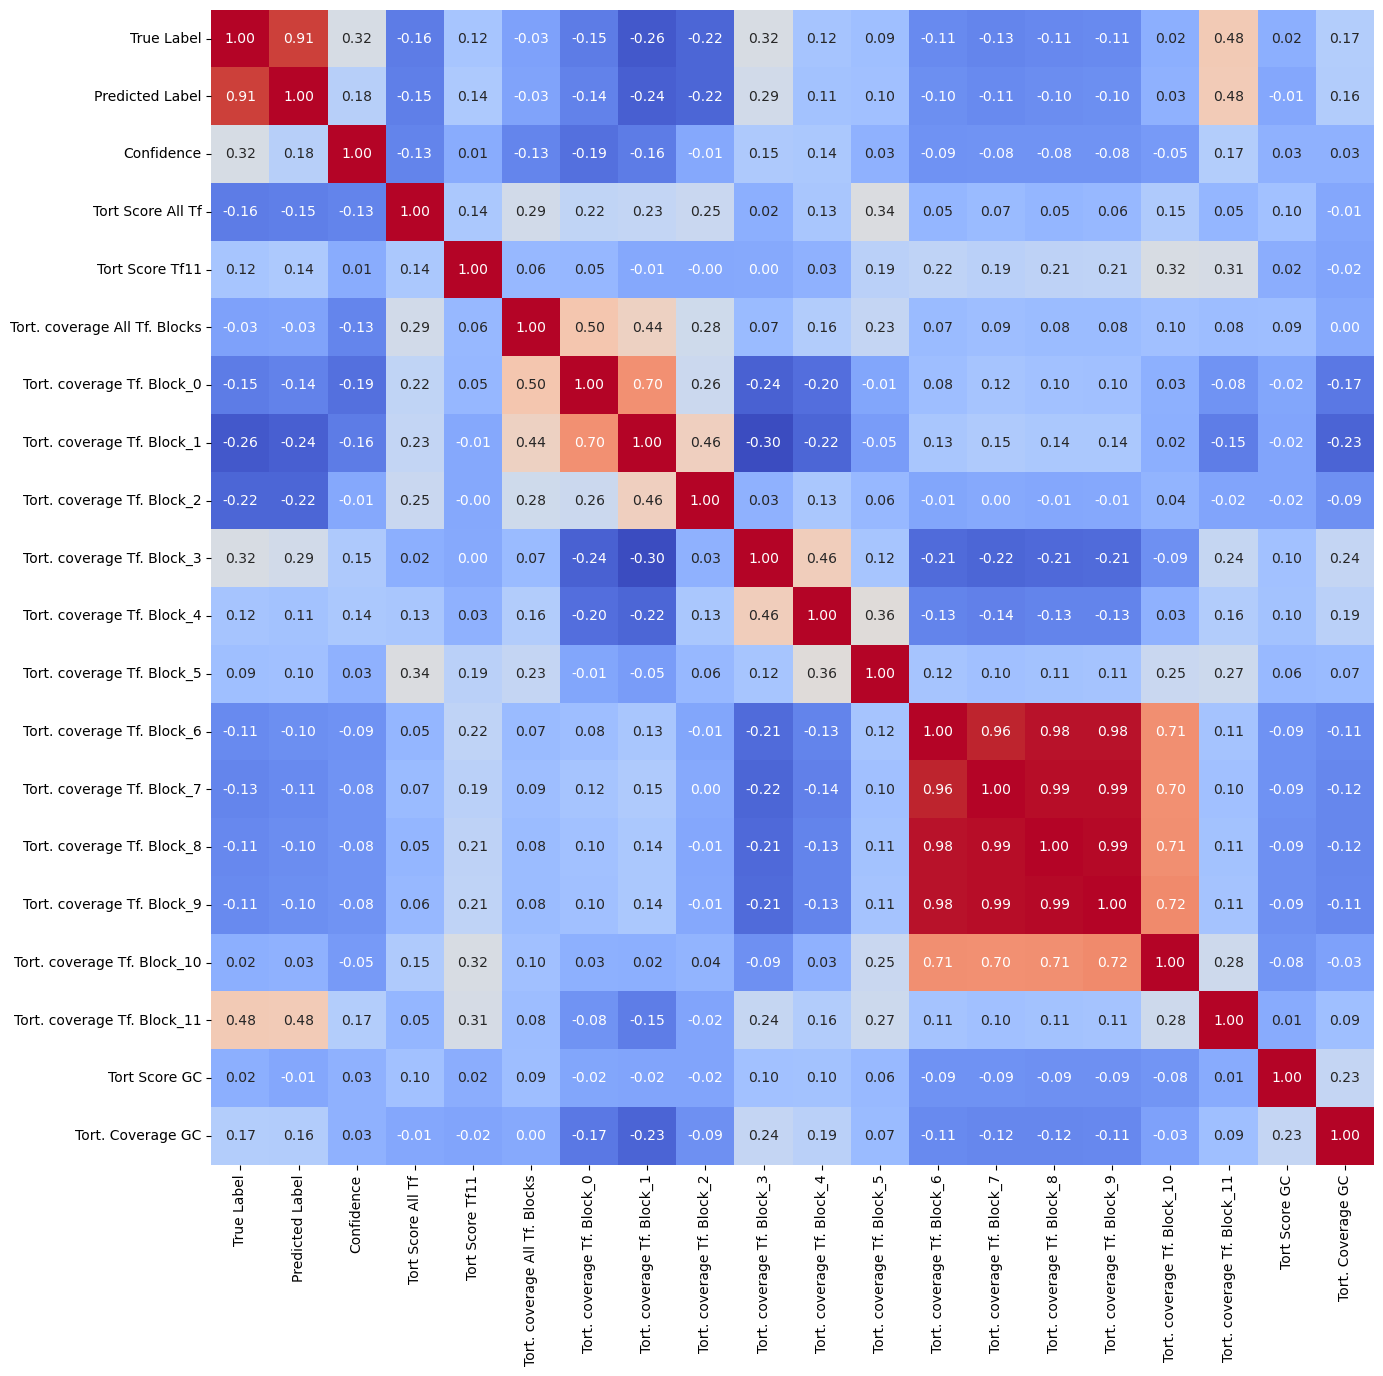

In [4]:
#Correlation matrix

df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15,15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()


### Tortuosity Coverage per Transformer Block

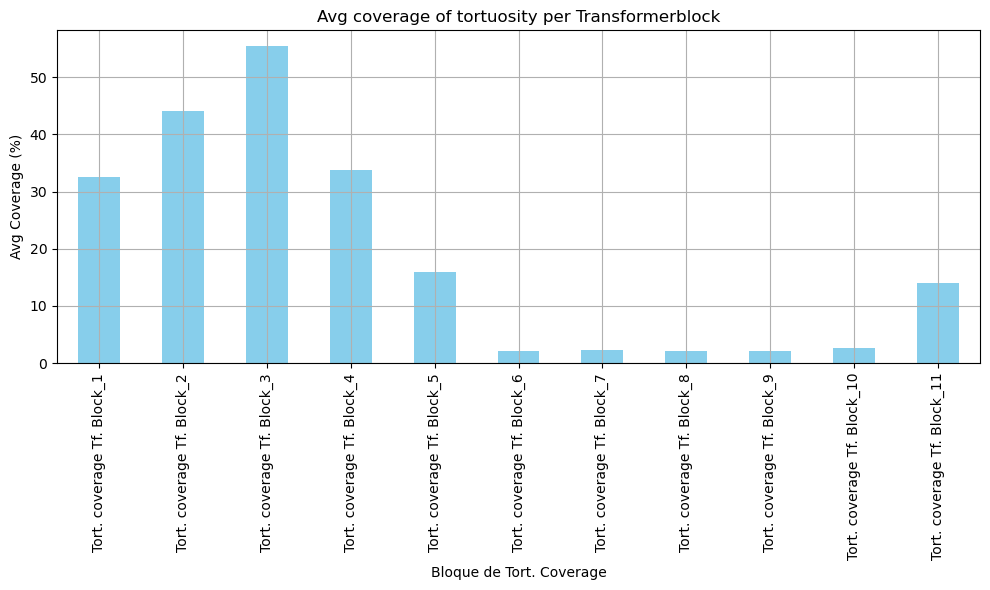

In [5]:
#Select columns
tort_coverage_columns = df.columns[8:]  
tort_coverage_data = df[tort_coverage_columns]

#Compute avg per column
mean_tort_coverages = tort_coverage_data.mean()

#Bar plot
plt.figure(figsize=(10, 6))
mean_tort_coverages.plot(kind='bar', color='skyblue')
plt.title('Avg coverage of tortuosity per Transformerblock')
plt.xlabel('Bloque de Tort. Coverage')
plt.ylabel('Avg Coverage (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Tortuosity Score Ratio All Tf per Predicció d'etiqueta

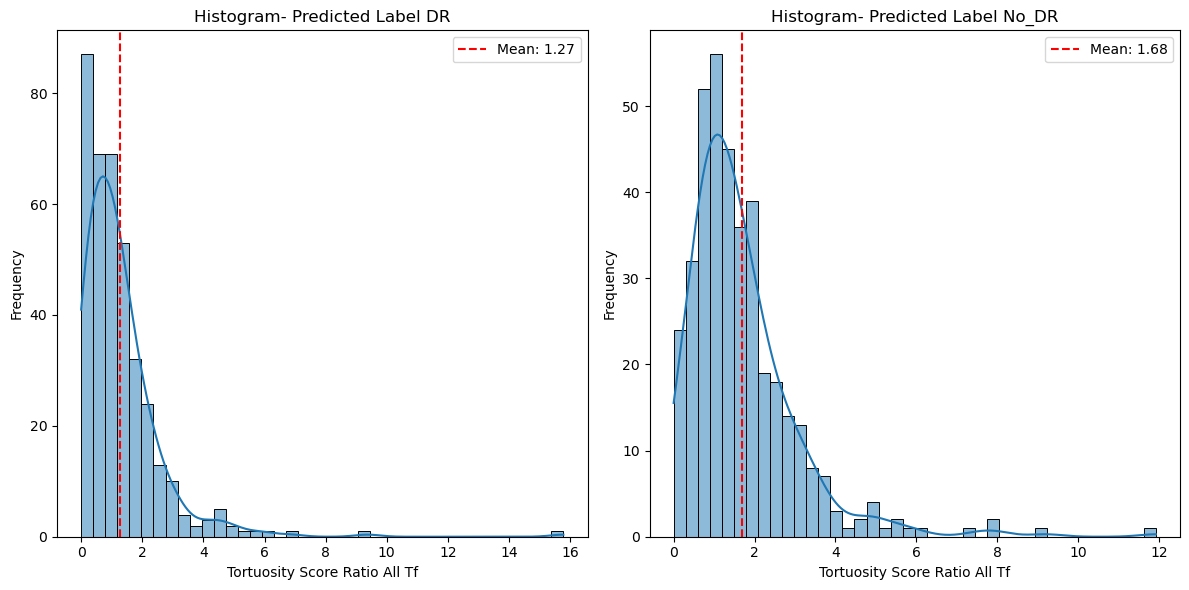

In [6]:
#Define the two subsets
subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}

metric='Tort Score All Tf'

plt.figure(figsize=(12, 6))

#Subplot counter
i = 1

#Plot histograms
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Score Ratio All Tf')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()




In [44]:
from scipy import stats
rvs1=df['Tort Score All Tf'].loc[df['Predicted Label']==1].values
rvs2=df['Tort Score All Tf'].loc[df['Predicted Label']==0].values
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-4.135248986841748, pvalue=3.9409400697358e-05)

### Tortuosity Score Ratio Tf11 per Predicció d'Etiqueta

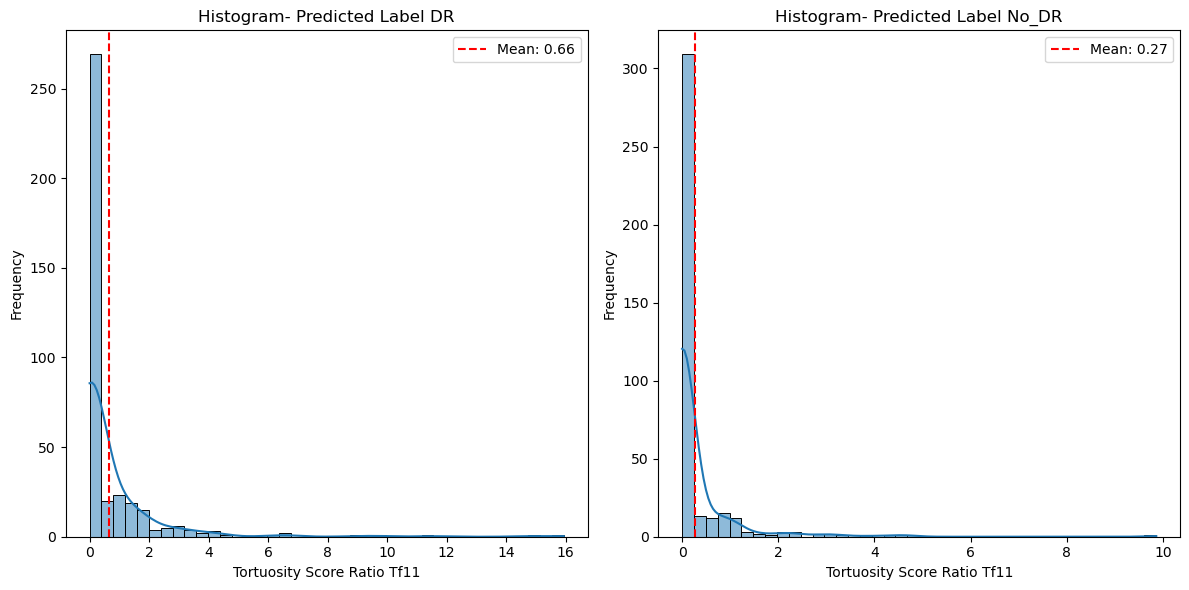

In [7]:

subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}


metric='Tort Score Tf11'

# Configurar la visualización
plt.figure(figsize=(12, 6))

# Contador para los subplots
i = 1

# Generar los histogramas
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Score Ratio Tf11')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()


In [45]:
#T-test
from scipy import stats
rvs1=df['Tort Score Tf11'].loc[df['Predicted Label']==1].values
rvs2=df['Tort Score Tf11'].loc[df['Predicted Label']==0].values
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=3.9512133594989964, pvalue=8.79262767363337e-05)

### Cobertures per Predicció etiqueta

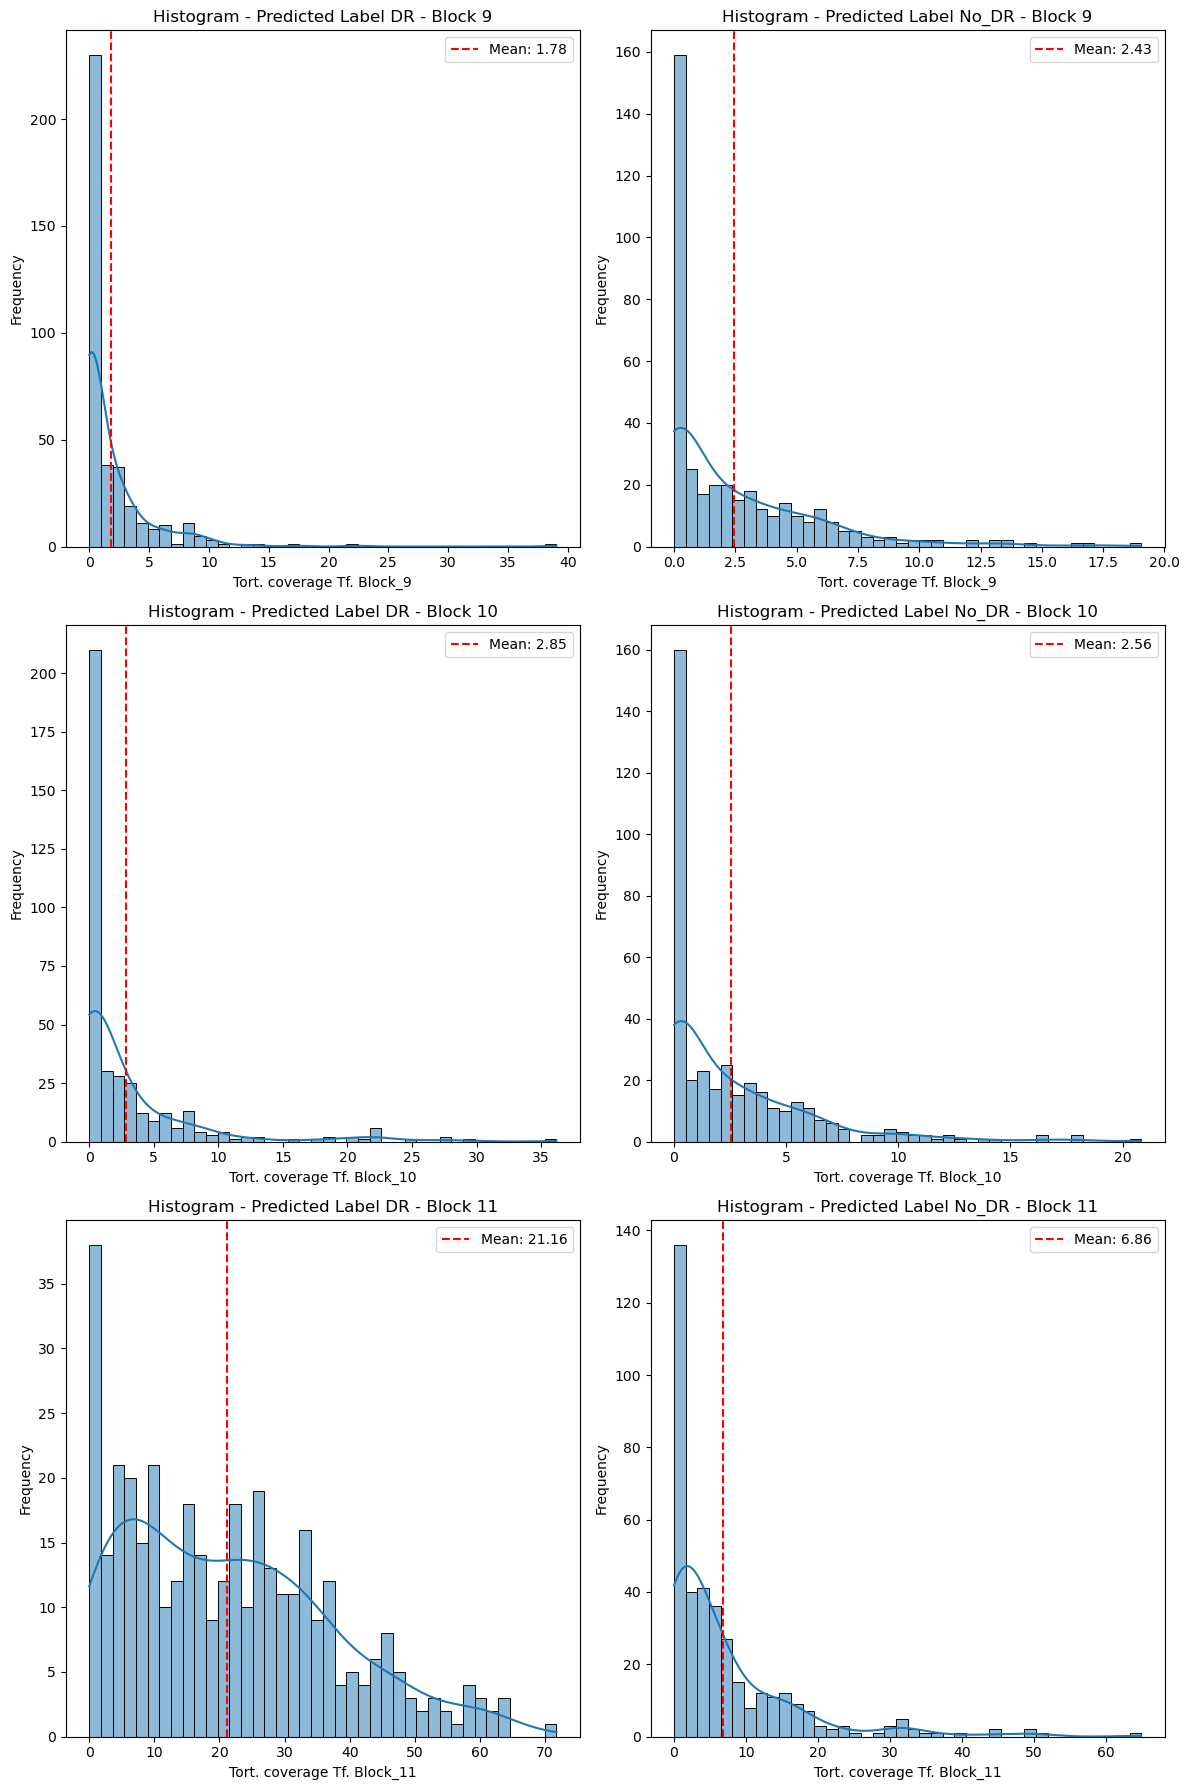

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}

# Configure plot for a batch of 3 blocks
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 filas para los 3 bloques, 2 columnas para cada etiqueta

# Iterate over 3 blocks in the batch
for block in range(9, 12):
    metric = f'Tort. coverage Tf. Block_{block}'
    
    #Init subplot index base on current range
    block_index = block - 9  # first block in the batch
    
    for i, (label, subset) in enumerate(subsets.items()):
        ax = axes[block_index, i] 
        sns.histplot(subset[metric], bins=40, kde=True, ax=ax)
        ax.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
        ax.set_title(f'Histogram - {label} - Block {block}')
        ax.set_xlabel(metric)
        ax.set_ylabel('Frequency')
        ax.legend()

plt.tight_layout()
plt.show()


### Visualitzar els ratios de cobertura segons predicció

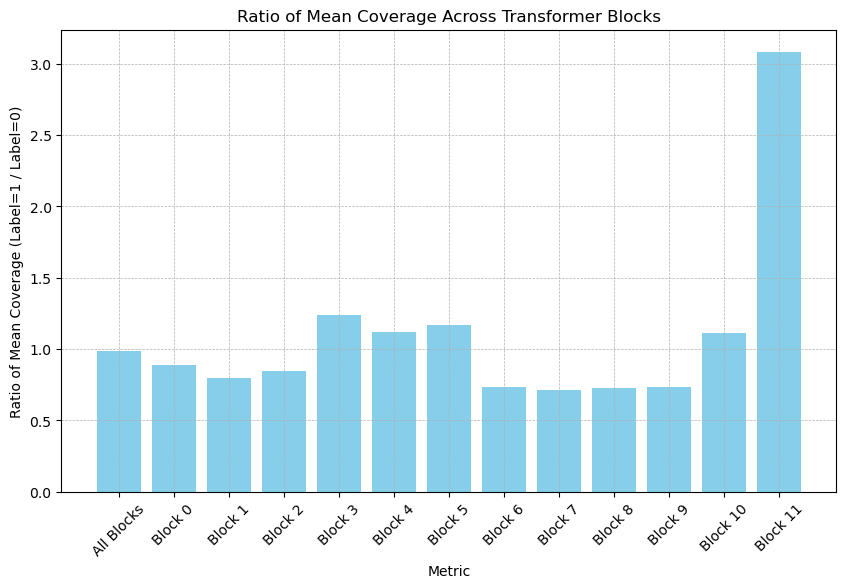

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que ya tienes el dataframe `df` cargado

# Subsets for DR and No_DR
subset_DR = df[df['Predicted Label'] == 1]
subset_No_DR = df[df['Predicted Label'] == 0]

# List to store ratios
ratios = []

# Add the Tort. "Coverage All Tf. Blocks" to the ratios list first
metric = 'Tort. coverage All Tf. Blocks'
mean_DR = subset_DR[metric].mean()
mean_No_DR = subset_No_DR[metric].mean()
if mean_No_DR != 0:
    ratio = mean_DR / mean_No_DR
else:
    ratio = None  # Handle if divisor is zero
ratios.append(ratio)

# Iterate over transformer blocks 0 to 11
for block in range(12):
    metric = f'Tort. coverage Tf. Block_{block}'
    
    # Compute metric avg for every subset
    mean_DR = subset_DR[metric].mean()
    mean_No_DR = subset_No_DR[metric].mean()
    
    # Compute ratio of avg values
    if mean_No_DR != 0:  # Avoid divide by zero
        ratio = mean_DR / mean_No_DR
    else:
        ratio = None  # Handle if divisor is zero
    
    # Add ratio to the list
    ratios.append(ratio)

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ratios)), ratios, color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Ratio of Mean Coverage (Label=1 / Label=0)')
plt.title('Ratio of Mean Coverage Across Transformer Blocks')
plt.xticks(range(len(ratios)), ['All Blocks'] + [f'Block {i}' for i in range(12)], rotation=45)  # Etiquetas para el eje X
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Construir model de predicció de Predicted Label a partir de les métriques calculades

In [5]:
df

,Image,True Label,Predicted Label,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,Tort. coverage Tf. Block_2,...,Tort. coverage Tf. Block_4,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11,Tort Score GC,Tort. Coverage GC
0,test_001.jpg,1,1,69.63,2.24,0.00,45.83,45.31,18.23,25.52,...,19.27,13.54,0.00,0.00,0.00,0.00,0.00,2.60,1.72,80.73
1,test_002.jpg,1,1,86.83,0.74,0.00,61.06,29.39,21.02,35.03,...,48.95,2.64,0.00,0.00,0.00,0.00,4.73,33.03,1.71,95.72
2,test_003.jpg,1,1,85.00,0.47,0.00,34.92,16.14,14.42,18.52,...,64.68,5.42,1.85,1.98,1.85,1.85,1.72,17.86,1.27,78.31
3,test_004.jpg,1,1,79.09,1.88,0.00,50.68,40.33,15.26,28.88,...,18.53,17.44,2.72,3.27,2.72,2.72,2.72,7.36,0.12,65.12
4,test_005.jpg,1,1,89.82,0.00,0.00,23.84,5.70,18.57,33.54,...,29.54,10.34,2.53,2.74,2.53,2.11,1.69,1.69,1.41,51.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,87.12,1.09,0.99,47.83,49.83,57.83,56.00,...,6.00,7.67,5.50,5.83,5.83,5.83,5.50,8.33,0.78,61.83
527,valid_528.jpg,0,1,52.21,2.74,0.00,44.53,57.54,50.59,27.51,...,26.63,20.27,3.40,3.55,4.14,4.44,4.44,3.85,0.00,49.41
528,valid_529.jpg,0,0,88.95,0.71,0.00,55.56,48.38,40.65,51.05,...,30.38,18.85,1.55,1.83,1.41,1.41,1.13,1.55,0.32,54.57
529,valid_530.jpg,0,0,71.86,0.73,0.00,54.50,44.46,40.29,41.20,...,30.25,21.12,2.35,2.35,2.35,2.35,2.35,2.35,0.49,32.99


Accuracy in every fold in training set: [0.77011494 0.7816092  0.77540984 0.77868852 0.76557377]
Accuracy in every fold in test set: [0.77777778 0.73856209 0.77631579 0.73026316 0.81578947]
Test Accuracy mean: 0.7677416580667354
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       383
           1       0.80      0.73      0.76       379

    accuracy                           0.78       762
   macro avg       0.78      0.78      0.77       762
weighted avg       0.78      0.78      0.78       762



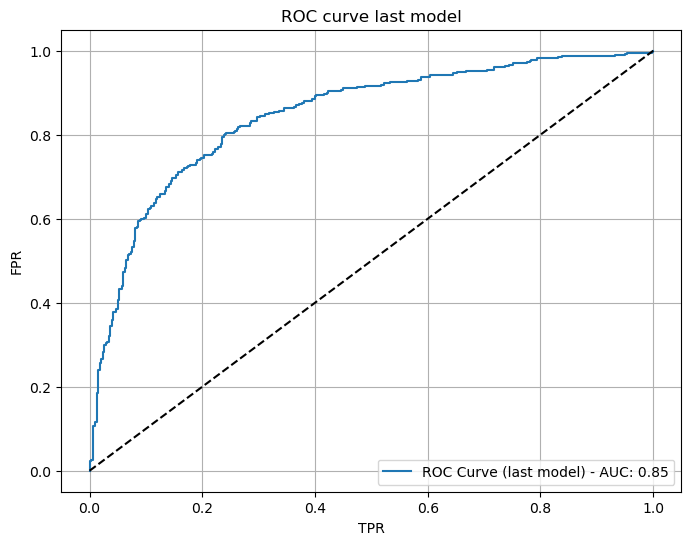

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_curve, classification_report, roc_auc_score
import matplotlib.pyplot as plt

#Independent variables (metrics)
columns=[5,7,8,9,10,11,12,18]
#columns=[5,7,8,9,10,11,12,13,14,15,16,17,18]

X = df.iloc[:, columns]  # todas las métricas

#Dependent variable
y = df.iloc[:, 2] 

# Create LR model
lr = LogisticRegression()

# Configure cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Definine score based on accuracy
scorer = make_scorer(accuracy_score)

#Compute cross validatin
cv_results = cross_validate(lr, X, y, cv=cv, scoring=scorer, return_train_score=True, return_estimator=True)

#Show results of cross validation
print("Accuracy in every fold in training set:", cv_results['train_score'])
print("Accuracy in every fold in test set:", cv_results['test_score'])
print("Test Accuracy mean:", np.mean(cv_results['test_score']))

#Show classification report for last model in last fold
last_model = cv_results['estimator'][-1]
y_pred = last_model.predict(X)  
print(classification_report(y, y_pred))

# ROC curve on last fold in last model 
y_probs = last_model.predict_proba(X)[:, 1]  
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc_value = roc_auc_score(y, y_probs)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label=f'ROC Curve (last model) - AUC: {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC curve last model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [10]:
# Obteniendo los nombres de las características y los coeficientes del modelo
# Accediendo al modelo entrenado en el último pliegue
last_model = cv_results['estimator'][-1]

# Extrayendo los coeficientes
coefficients = last_model.coef_[0]


feature_names = X.columns

# Creando un DataFrame para relacionar los coeficientes con sus características correspondientes.
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando las características por el valor absoluto de los coeficientes para ver cuáles tienen más peso.
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Mostrando el DataFrame resultante.
coef_df



,Feature,Coefficient
7,Tort. coverage Tf. Block_11,0.090607
3,Tort. coverage Tf. Block_2,-0.035060
4,Tort. coverage Tf. Block_3,0.022110
2,Tort. coverage Tf. Block_1,-0.012122
6,Tort. coverage Tf. Block_5,-0.008730
1,Tort. coverage Tf. Block_0,0.008050
0,Tort Score Tf11,0.004216
5,Tort. coverage Tf. Block_4,-0.004092


## Bonus track Mètriques del Grad-cam

### Afegir les prediccions del model CNN al dataset

In [5]:
#carregar els dos dataframes: test i validació. Construir un dataframe de totes les dades del model ViT
df_test_CNN = pd.read_excel('Resultats/resultats_1_test_CNN.xlsx', engine='openpyxl')
df_valid_CNN = pd.read_excel('Resultats/resultats_1_valid_CNN.xlsx', engine='openpyxl')
df_tot_CNN = pd.concat([df_test_CNN, df_valid_CNN], axis=0)

In [6]:
df_tot_CNN

,Image,True Label,Predicted Label,Confidence
0,test_001.jpg,1,1,88.830000
1,test_002.jpg,1,1,99.870000
2,test_003.jpg,1,1,99.880000
3,test_004.jpg,1,0,67.330000
4,test_005.jpg,1,1,91.650000
...,...,...,...,...
526,valid_527.jpg,0,0,99.925286
527,valid_528.jpg,0,0,94.961333
528,valid_529.jpg,0,0,98.205870
529,valid_530.jpg,0,0,96.023983


In [7]:
df_tot

,Image,True Label,Predicted Label,Correct,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,...,Tort. coverage Tf. Block_4,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11,Tort Score GC,Tort. Coverage GC
0,test_001.jpg,1,1,1,69.63,2.24,0.00,45.83,45.31,18.23,...,19.27,13.54,0.00,0.00,0.00,0.00,0.00,2.60,1.72,80.73
1,test_002.jpg,1,1,1,86.83,0.74,0.00,61.06,29.39,21.02,...,48.95,2.64,0.00,0.00,0.00,0.00,4.73,33.03,1.71,95.72
2,test_003.jpg,1,1,1,85.00,0.47,0.00,34.92,16.14,14.42,...,64.68,5.42,1.85,1.98,1.85,1.85,1.72,17.86,1.27,78.31
3,test_004.jpg,1,1,1,79.09,1.88,0.00,50.68,40.33,15.26,...,18.53,17.44,2.72,3.27,2.72,2.72,2.72,7.36,0.12,65.12
4,test_005.jpg,1,1,1,89.82,0.00,0.00,23.84,5.70,18.57,...,29.54,10.34,2.53,2.74,2.53,2.11,1.69,1.69,1.41,51.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,1,87.12,1.09,0.99,47.83,49.83,57.83,...,6.00,7.67,5.50,5.83,5.83,5.83,5.50,8.33,0.78,61.83
527,valid_528.jpg,0,1,0,52.21,2.74,0.00,44.53,57.54,50.59,...,26.63,20.27,3.40,3.55,4.14,4.44,4.44,3.85,0.00,49.41
528,valid_529.jpg,0,0,1,88.95,0.71,0.00,55.56,48.38,40.65,...,30.38,18.85,1.55,1.83,1.41,1.41,1.13,1.55,0.32,54.57
529,valid_530.jpg,0,0,1,71.86,0.73,0.00,54.50,44.46,40.29,...,30.25,21.12,2.35,2.35,2.35,2.35,2.35,2.35,0.49,32.99


In [8]:
#afegir columna de les prediccions CNN al dataset
# Seleccionar la columna 'Predicted Label' de df_tot_CNN i renombrar
df_tot_CNN['Predicted Label CNN'] = df_tot_CNN['Predicted Label']

# Afegir la columna renombrada a df_tot
df_tot['Predicted Label CNN'] = df_tot_CNN['Predicted Label CNN']

df=df_tot
df

,Image,True Label,Predicted Label,Correct,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,...,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11,Tort Score GC,Tort. Coverage GC,Predicted Label CNN
0,test_001.jpg,1,1,1,69.63,2.24,0.00,45.83,45.31,18.23,...,13.54,0.00,0.00,0.00,0.00,0.00,2.60,1.72,80.73,1
1,test_002.jpg,1,1,1,86.83,0.74,0.00,61.06,29.39,21.02,...,2.64,0.00,0.00,0.00,0.00,4.73,33.03,1.71,95.72,1
2,test_003.jpg,1,1,1,85.00,0.47,0.00,34.92,16.14,14.42,...,5.42,1.85,1.98,1.85,1.85,1.72,17.86,1.27,78.31,1
3,test_004.jpg,1,1,1,79.09,1.88,0.00,50.68,40.33,15.26,...,17.44,2.72,3.27,2.72,2.72,2.72,7.36,0.12,65.12,0
4,test_005.jpg,1,1,1,89.82,0.00,0.00,23.84,5.70,18.57,...,10.34,2.53,2.74,2.53,2.11,1.69,1.69,1.41,51.48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,1,87.12,1.09,0.99,47.83,49.83,57.83,...,7.67,5.50,5.83,5.83,5.83,5.50,8.33,0.78,61.83,0
527,valid_528.jpg,0,1,0,52.21,2.74,0.00,44.53,57.54,50.59,...,20.27,3.40,3.55,4.14,4.44,4.44,3.85,0.00,49.41,0
528,valid_529.jpg,0,0,1,88.95,0.71,0.00,55.56,48.38,40.65,...,18.85,1.55,1.83,1.41,1.41,1.13,1.55,0.32,54.57,0
529,valid_530.jpg,0,0,1,71.86,0.73,0.00,54.50,44.46,40.29,...,21.12,2.35,2.35,2.35,2.35,2.35,2.35,0.49,32.99,0


### Correlacions

In [9]:
# Renombrar la columna 'old_name' a 'new_name'
df.rename(columns={'Predicted Label': 'Predicted label ViT'}, inplace=True)

In [12]:
df

,Image,True Label,Predicted label ViT,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,Tort. coverage Tf. Block_2,...,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11,Tort Score GC,Tort. Coverage GC,Predicted Label CNN
0,test_001.jpg,1,1,69.63,2.24,0.00,45.83,45.31,18.23,25.52,...,13.54,0.00,0.00,0.00,0.00,0.00,2.60,1.72,80.73,1
1,test_002.jpg,1,1,86.83,0.74,0.00,61.06,29.39,21.02,35.03,...,2.64,0.00,0.00,0.00,0.00,4.73,33.03,1.71,95.72,1
2,test_003.jpg,1,1,85.00,0.47,0.00,34.92,16.14,14.42,18.52,...,5.42,1.85,1.98,1.85,1.85,1.72,17.86,1.27,78.31,1
3,test_004.jpg,1,1,79.09,1.88,0.00,50.68,40.33,15.26,28.88,...,17.44,2.72,3.27,2.72,2.72,2.72,7.36,0.12,65.12,0
4,test_005.jpg,1,1,89.82,0.00,0.00,23.84,5.70,18.57,33.54,...,10.34,2.53,2.74,2.53,2.11,1.69,1.69,1.41,51.48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,87.12,1.09,0.99,47.83,49.83,57.83,56.00,...,7.67,5.50,5.83,5.83,5.83,5.50,8.33,0.78,61.83,0
527,valid_528.jpg,0,1,52.21,2.74,0.00,44.53,57.54,50.59,27.51,...,20.27,3.40,3.55,4.14,4.44,4.44,3.85,0.00,49.41,0
528,valid_529.jpg,0,0,88.95,0.71,0.00,55.56,48.38,40.65,51.05,...,18.85,1.55,1.83,1.41,1.41,1.13,1.55,0.32,54.57,0
529,valid_530.jpg,0,0,71.86,0.73,0.00,54.50,44.46,40.29,41.20,...,21.12,2.35,2.35,2.35,2.35,2.35,2.35,0.49,32.99,0


In [13]:
df.to_excel('Resultats/resultats_4_tot.xlsx', index=False)

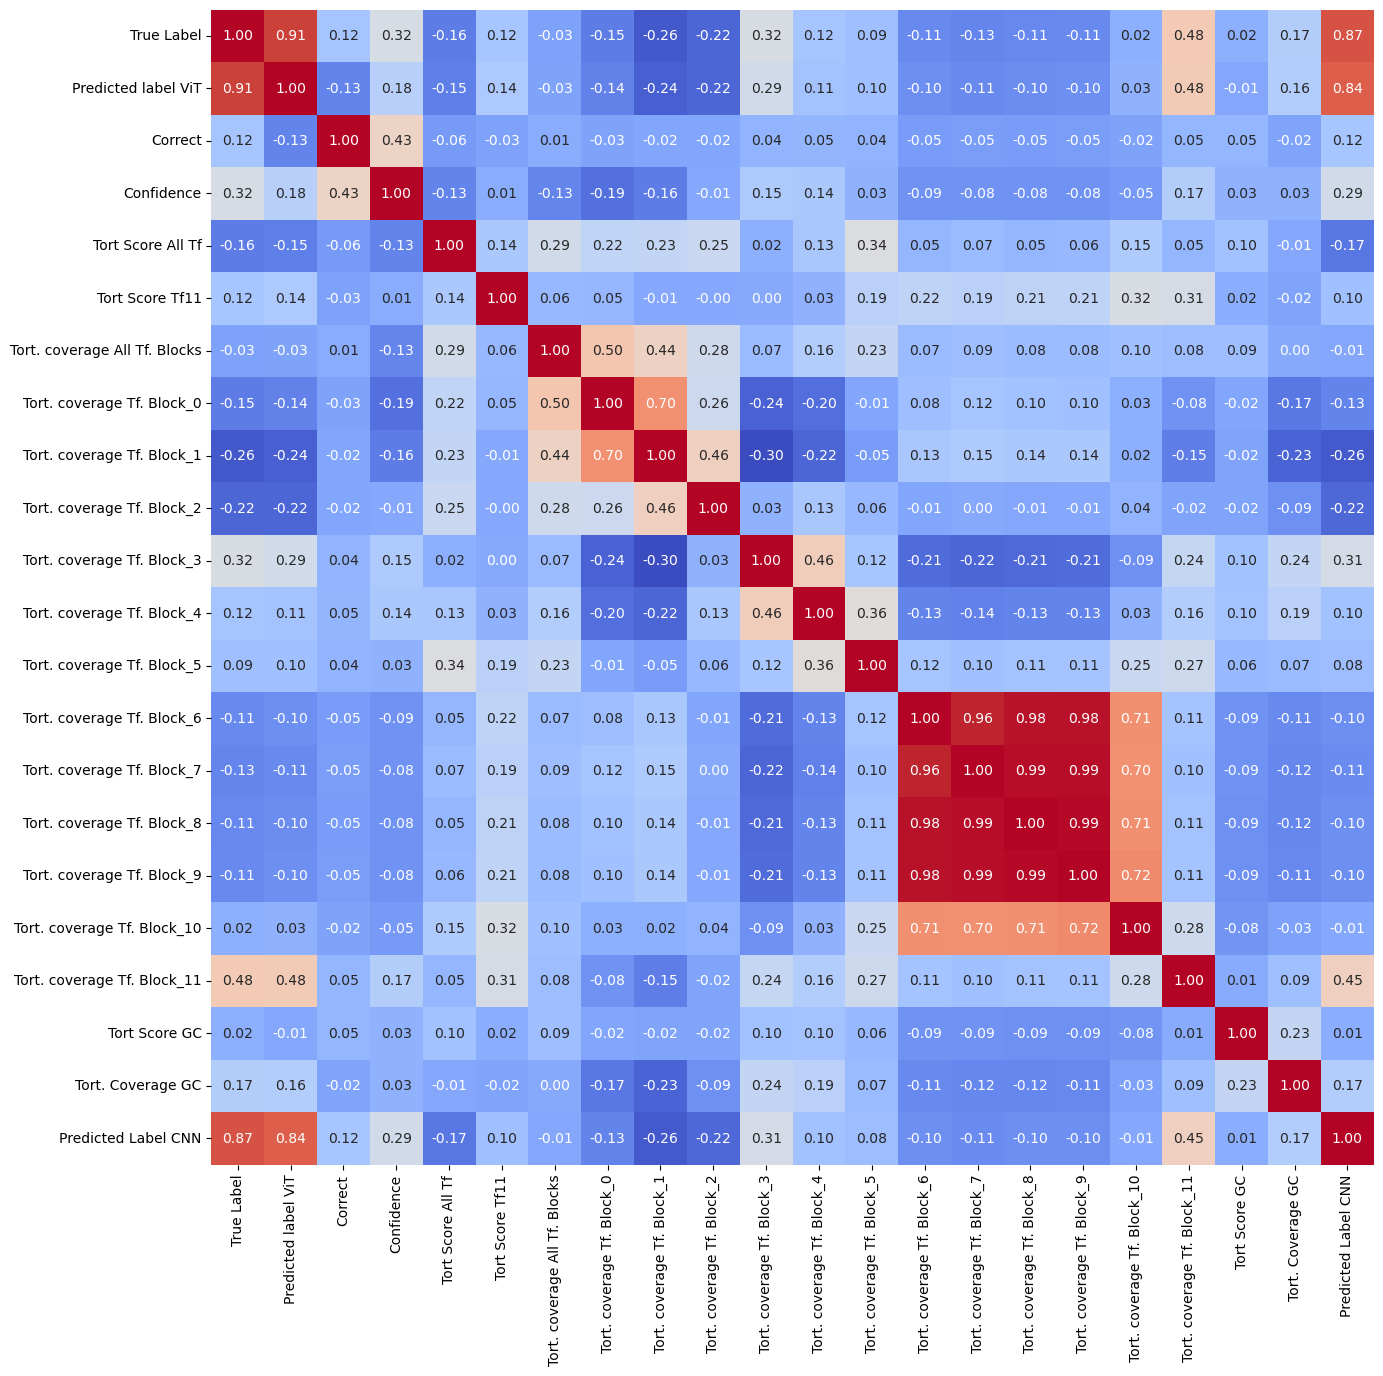

In [25]:
#Correlation matrix

df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15,15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()

### Tortuosity Score Ratio Grad-cam per Predicció d'etiqueta

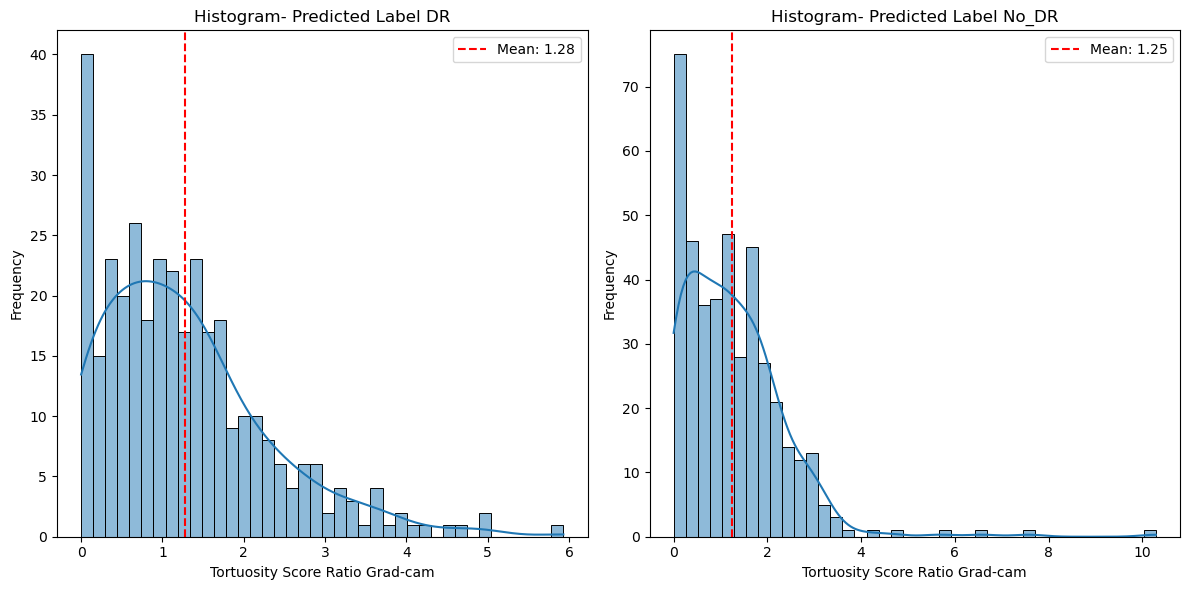

In [21]:
#Define the two subsets
subsets = {
    'Predicted Label DR': df[df['Predicted Label CNN'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label CNN'] == 0]
}

metric='Tort Score GC'

plt.figure(figsize=(12, 6))

#Subplot counter
i = 1

#Plot histograms
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Score Ratio Grad-cam')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()


### Attention coverage Grad-cam per Predicció d'etiqueta

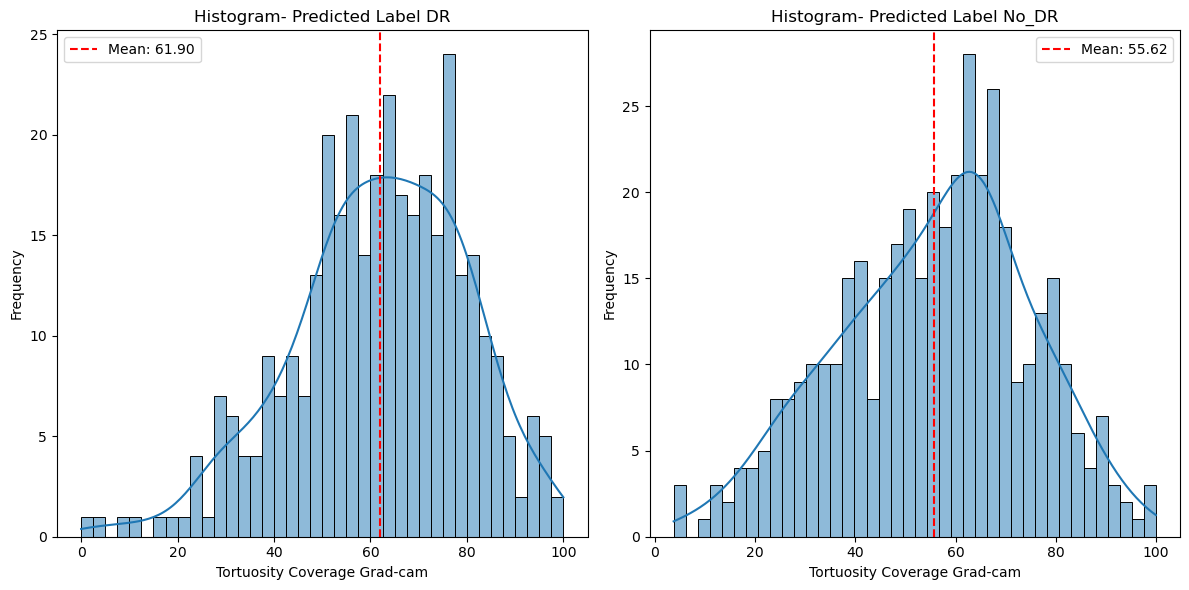

In [26]:
#Define the two subsets
subsets = {
    'Predicted Label DR': df[df['Predicted Label CNN'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label CNN'] == 0]
}

metric='Tort. Coverage GC'

plt.figure(figsize=(12, 6))

#Subplot counter
i = 1

#Plot histograms
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Coverage Grad-cam')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()